# pandas

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. 

After a brief introduction to these two data structures and data ingestion, this notebook covers:
* Generating descriptive statistics on data
* Data cleaning using built-in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

### Import Libraries

In [1]:
import pandas as pd

### Introduction to Pandas Data Structures: Series
**pandas** has two main data structures
* Series
* DataFrames

### Series

In [2]:
pandas_series = pd.Series(data=[100, 200, 300, 400, 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

#no need for data and index
#pandas_series = pd.Series([100, 200, 300, 400, 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

#heterogenous data types
pandas_series = pd.Series([100, 'foo', 300, "bar", 500], index=['tom', 'bob', 'nancy', 'dan', 'eric'])

In [3]:
pandas_series

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

### Accessing Data

In [4]:
pandas_series.index

pandas_series['nancy']
#pandas_series.loc['nancy']
#pandas_series.loc[['nancy','bob']]

300

In [5]:
## Elements can also be selected using their index location.
pandas_series[[4, 3, 1]]
## This retrieves the elements at the selected rows. Row numbers from 0

#index location
#pandas_series.iloc[2]
pandas_series.iloc[[2,4]]

nancy    300
eric     500
dtype: object

In [6]:
'bob' in pandas_series

True

### Operations on Series

In [7]:
pandas_series * 2
#pandas_series[['nancy','bob']] * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

## Introduction to Pandas Data Structures: DataFrames

**pandas** has two main data structures
* Series
* DataFrames

### DataFrames
Creating a DataFrame

In [8]:
df = pd.DataFrame(columns=['A','B','C','D','E','F','G'])
# creates an empty dataframe with the columns specified
df

Empty DataFrame
Columns: [A, B, C, D, E, F, G]
Index: []

### Saving/ Loading a DataFrame to a pickle

In [9]:
df = pd.DataFrame(columns=['A','B','C','D','E','F','G'])
df.to_pickle("empty_dataframe.pickle")
del df # we delete the dataframe after saving to the pickle file
#df

'df' variable no longer stores the dataframe. We now load the dataframe back into df

In [10]:
df = pd.read_pickle('empty_dataframe.pickle')
df

Empty DataFrame
Columns: [A, B, C, D, E, F, G]
Index: []

### Creating a DataFrame from numpy array

In [11]:
import numpy as np

In [12]:
np_array = np.random.randint(1,11,size=(10, 4)) 
# this creates a 10 x 4 numpy array of random integers sampled from [1,11)
print(np_array)
df = pd.DataFrame(np_array, columns=['A', 'B', 'C', 'D']) # the 4 columns in the numpy array are now the 4 columns of the pandas dataframe
df

[[ 9  5  6  8]
 [ 5  3  5  1]
 [ 4 10 10  6]
 [ 5  9  1  6]
 [ 4  9  9  8]
 [ 3  9 10  8]
 [ 7  5  2 10]
 [ 8  5  7  6]
 [10  4  1  9]
 [ 2  9  7  6]]


A   B   C   D
0   9   5   6   8
1   5   3   5   1
2   4  10  10   6
3   5   9   1   6
4   4   9   9   8
5   3   9  10   8
6   7   5   2  10
7   8   5   7   6
8  10   4   1   9
9   2   9   7   6

### Create DataFrame from list of Python dictionaries

In [13]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]
#data = [{'alex': 1, 'joe': 2}]

In [14]:
pd.DataFrame(data)

alex  joe  ema  dora  alice
0   1.0  2.0  NaN   NaN    NaN
1   NaN  NaN  5.0  10.0   20.0

In [15]:
pd.DataFrame(data, index=['orange', 'red'])

alex  joe  ema  dora  alice
orange   1.0  2.0  NaN   NaN    NaN
red      NaN  NaN  5.0  10.0   20.0

In [16]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

joe  dora  alice
0  2.0   NaN    NaN
1  NaN  10.0   20.0

### Creating DataFrame from dictionary of Python Series

In [17]:
dict1 = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}
print(dict1)

{'one': apple    100.0
ball     200.0
clock    300.0
dtype: float64, 'two': apple      111.0
ball       222.0
cerill     333.0
dancy     4444.0
dtype: float64}


In [18]:
df = pd.DataFrame(dict1)
df
#print(df)

one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0

#### Accessing Data

In [19]:
pd.DataFrame(dict1, index=['dancy', 'ball', 'apple']) # retrieving rows using their index / key

one     two
dancy    NaN  4444.0
ball   200.0   222.0
apple  100.0   111.0

In [20]:
df = pd.DataFrame(dict1, index=['dancy', 'ball', 'apple'], columns=['two', 'five']) 
# we can also restrain the number of columns we retrieve
df

two five
dancy  4444.0  NaN
ball    222.0  NaN
apple   111.0  NaN

In [21]:
df.index

Index(['dancy', 'ball', 'apple'], dtype='object')

In [22]:
df.columns

Index(['two', 'five'], dtype='object')

#### Basic DataFrame operations

In [23]:
df = pd.DataFrame(dict1)
df

one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0

In [24]:
df['one']

apple     100.0
ball      200.0
cerill      NaN
clock     300.0
dancy       NaN
Name: one, dtype: float64

#### Working with Columns in DataFrames

In [25]:
df['three'] = df['one'] * df['two']
df

one     two    three
apple   100.0   111.0  11100.0
ball    200.0   222.0  44400.0
cerill    NaN   333.0      NaN
clock   300.0     NaN      NaN
dancy     NaN  4444.0      NaN

In [26]:
df['flag'] = df['one'] > 250 
# creating a new column which is True for rows with 'one' value greater than 250
df

one     two    three   flag
apple   100.0   111.0  11100.0  False
ball    200.0   222.0  44400.0  False
cerill    NaN   333.0      NaN  False
clock   300.0     NaN      NaN   True
dancy     NaN  4444.0      NaN  False

In [27]:
three = df.pop('three') 
# removes a column from the dataframe and saves to 'three' variable
df

one     two   flag
apple   100.0   111.0  False
ball    200.0   222.0  False
cerill    NaN   333.0  False
clock   300.0     NaN   True
dancy     NaN  4444.0  False

In [28]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [29]:
df

one     two   flag
apple   100.0   111.0  False
ball    200.0   222.0  False
cerill    NaN   333.0  False
clock   300.0     NaN   True
dancy     NaN  4444.0  False

In [30]:
del df['two'] # another way to drop or delete a column

In [31]:
df

one   flag
apple   100.0  False
ball    200.0  False
cerill    NaN  False
clock   300.0   True
dancy     NaN  False

In [32]:
df.insert(2, 'copy_of_one', df['one']) 
# creates a column called 'copy_of_one' from values of the series df['one'] at position 2
df

one   flag  copy_of_one
apple   100.0  False        100.0
ball    200.0  False        200.0
cerill    NaN  False          NaN
clock   300.0   True        300.0
dancy     NaN  False          NaN

In [33]:
df['one_upper_half'] = df['one'][:2]
# we create a new column with only two elements, the rest of the rows will receive a NaN value
df

one   flag  copy_of_one  one_upper_half
apple   100.0  False        100.0           100.0
ball    200.0  False        200.0           200.0
cerill    NaN  False          NaN             NaN
clock   300.0   True        300.0             NaN
dancy     NaN  False          NaN             NaN

In [34]:
df.insert(2, 'one_lower_half', df['one'][2:])
# we create a new column with only two elements, the rest of the rows will recieve a NaN value
df

one   flag  one_lower_half  copy_of_one  one_upper_half
apple   100.0  False             NaN        100.0           100.0
ball    200.0  False             NaN        200.0           200.0
cerill    NaN  False             NaN          NaN             NaN
clock   300.0   True           300.0        300.0             NaN
dancy     NaN  False             NaN          NaN             NaN

### Case Study: Movie Data Analysis

This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. Please note that it is already available in the files for Day 2 so you don't need to download the dataset, but here are the links to the data source and location. 

* Data Source: MovieLens web site (filename: ml-20m.zip)
* Location: https://grouplens.org/datasets/movielens/

### Objective
We seek to draw inferences from this dataset, whilst exploring some of the functionalities pandas has to offer.

Let us look at the files in this dataset using the UNIX command ls.

In [35]:
# Note: Adjust the name of the folder to match your local directory
!ls ./movielens
!cat ./movielens/movies.csv | wc -l
!head -5 ./movielens/movies.csv

Icon?               genome-tags.csv     ratings.csv
README.txt          links.csv           ratings_reduced.csv
genome-scores.csv   movies.csv          tags.csv
   27279
movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance


### Use Pandas to Read the Dataset

In this notebook, we will be using three CSV files:

* ratings.csv: *userId*,*movieId*,*rating*, *timestamp*
* tags.csv: *userId*,*movieId*, *tag*, *timestamp*
* movies.csv: *movieId*, *title*, *genres*


Using the *read_csv* function in pandas, we will ingest these three files.

### Loading the datasets

In [36]:
movies = pd.read_csv('./movielens/movies.csv', sep=',')
print(type(movies))
movies.head(10)

<class 'pandas.core.frame.DataFrame'>


movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8                                       Action  
9                    Action|Adventure|Thriller

In [37]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

userId  movieId            tag   timestamp
0      18     4141    Mark Waters  1240597180
1      65      208      dark hero  1368150078
2      65      353      dark hero  1368150079
3      65      521  noir thriller  1368149983
4      65      592      dark hero  1368150078

In [38]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

userId  movieId  rating   timestamp
0       1        2     3.5  1112486027
1       1       29     3.5  1112484676
2       1       32     3.5  1112484819
3       1       47     3.5  1112484727
4       1       50     3.5  1112484580

In [39]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

### Analyzing the DataFrames

</h1>

In [40]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [41]:
print(row_0)

userId              18
movieId           4141
tag        Mark Waters
Name: 0, dtype: object


### Working with Dataframe Rows (cont.)

In [42]:
row_0.index

Index(['userId', 'movieId', 'tag'], dtype='object')

In [43]:
row_0['userId']

18

In [44]:
tags[tags.userId == 18]

userId  movieId          tag
0      18     4141  Mark Waters

### Working with Dataframe Rows (cont.)

In [45]:
'rating' in row_0 #checking for the existence of a column in a row

False

In [46]:
row_0.name # prints the index name of the row

0

In [47]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

In [48]:
tags.head()

userId  movieId            tag
0      18     4141    Mark Waters
1      65      208      dark hero
2      65      353      dark hero
3      65      521  noir thriller
4      65      592      dark hero

In [49]:
tags.index

RangeIndex(start=0, stop=465564, step=1)

In [50]:
tags.info

<bound method DataFrame.info of         userId  movieId            tag
0           18     4141    Mark Waters
1           65      208      dark hero
2           65      353      dark hero
3           65      521  noir thriller
4           65      592      dark hero
...        ...      ...            ...
465559  138446    55999        dragged
465560  138446    55999  Jason Bateman
465561  138446    55999         quirky
465562  138446    55999            sad
465563  138472      923  rise to power

[465564 rows x 3 columns]>

In [51]:
tags.shape

(465564, 3)

In [52]:
len(tags)

465564

In [53]:
len(tags.columns)

3

In [54]:
tags.size

1396692

In [55]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

userId  movieId                tag
0         18     4141        Mark Waters
11        65     1783      noir thriller
2000     910    68554  conspiracy theory

In [56]:
tags.columns

Index(['userId', 'movieId', 'tag'], dtype='object')

## <h1 style="font-size:2em;color:#2467C0">Statistics: Let us look how the ratings are distributed </h1><br><br><br><br><br>

<h1 style="font-size:1.5em;color:#2467C0"> Statistics of the ratings<h1>

In [57]:
ratings['rating'].describe()

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [58]:
ratings.describe()

userId       movieId        rating
count  2.000026e+07  2.000026e+07  2.000026e+07
mean   6.904587e+04  9.041567e+03  3.525529e+00
std    4.003863e+04  1.978948e+04  1.051989e+00
min    1.000000e+00  1.000000e+00  5.000000e-01
25%    3.439500e+04  9.020000e+02  3.000000e+00
50%    6.914100e+04  2.167000e+03  3.500000e+00
75%    1.036370e+05  4.770000e+03  4.000000e+00
max    1.384930e+05  1.312620e+05  5.000000e+00

### Statistics of the ratings

In [59]:
ratings['rating'].mean()

3.5255285642993797

In [60]:
ratings['rating'].min()

0.5

In [61]:
ratings['rating'].max()

5.0

In [62]:
ratings['rating'].std() # standard deviation

1.051988919275684

In [63]:
ratings['rating'].mode()

0    4.0
Name: rating, dtype: float64

### Hands-on Exercise 1: Find most frequently reviewed movie
Print the id of the movie with the most ratings<br>
<b>Bonus:</b> Print the title of this movie

In [90]:
ratings['movieId'].mode()

0    296
Name: movieId, dtype: int64

In [89]:
movies.at[296, 'title']

'Priest (1994)'

### Hands-on Exercise 2: Find the Mean Rating of a Movie¶
The movie Toy Story has movieId 1. Find out the mean rating for Toy Story. For this exercise you just need to use the ratings DataFrame:

In [127]:
filter = ratings['movieId'] == 1
toy_story_rating = ratings[filter]['rating'].mean()

In [128]:
assert abs(toy_story_rating - 3.92) < 0.01, "Try again, select only the rows where the movieId is equal to 1"

<h1 style="font-size:1.5em;color:#2467C0"> Filtering a Column</h1>

In [129]:
filter_1 = ratings['rating'] > 5
filter_1.any()

False

In [130]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

### Data Cleaning: Handling Missing Data

#### Missing Values

In [ ]:
movies.shape

In [ ]:
#is any row NULL ?

movies.isnull().any()

No NULL values exist

In [ ]:
ratings.shape

In [ ]:
#is any row NULL ?

ratings.isnull().any()

No NULL values exist

In [ ]:
tags.shape

In [ ]:
#is any row NULL ?

tags.isnull().any()

We have some tags which are NULL.

In [ ]:
tags = tags.dropna()

In [ ]:
#Checking again if any row is NULL ?

tags.isnull().any()

In [ ]:
tags.shape

Notice the number of rows have reduced from 465564 to 465548

### Hands-on Exercise 3: Filter by Genre
Let's implement a general function that filters movies by genres:

In [162]:
def filter_by_genre(input_movies, genre):
    filter = movies.genres.str.split('|')
    return movies['title'][filter.str.contains(genre, regex=False)]
    # TODO

In [163]:
movies['title'][filter.str.contains('Fantasy', regex=False)]

0                                         Toy Story (1995)
1                                           Jumanji (1995)
28       City of Lost Children, The (Cité des enfants p...
43                                    Mortal Kombat (1995)
55                          Kids of the Round Table (1995)
                               ...                        
27208                           Ronal the Barbarian (2011)
27215               Cinderella III: A Twist in Time (2007)
27217                     Hui Buh: The Castle Ghost (2006)
27270                                Brother Bear 2 (2006)
27277                                     Innocence (2014)
Name: title, Length: 1412, dtype: object

Then let's apply it to the dataset to retain only the "Fantasy" movies:

In [164]:
fantasy_movies = filter_by_genre(movies, "Fantasy")
assert len(movies) == 27278, "Try again, check the documentation of the function you used"

fantasy_movies

0                                         Toy Story (1995)
1                                           Jumanji (1995)
28       City of Lost Children, The (Cité des enfants p...
43                                    Mortal Kombat (1995)
55                          Kids of the Round Table (1995)
                               ...                        
27208                           Ronal the Barbarian (2011)
27215               Cinderella III: A Twist in Time (2007)
27217                     Hui Buh: The Castle Ghost (2006)
27270                                Brother Bear 2 (2006)
27277                                     Innocence (2014)
Name: title, Length: 1412, dtype: object

## Visualizing the Data - Ratings

### Histograms

A histogram is a plot of the underlying frequency distribution (shape) of a set of continuous data. 
This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc. 
An example of a histogram, and the raw data it was constructed from, is shown below:

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

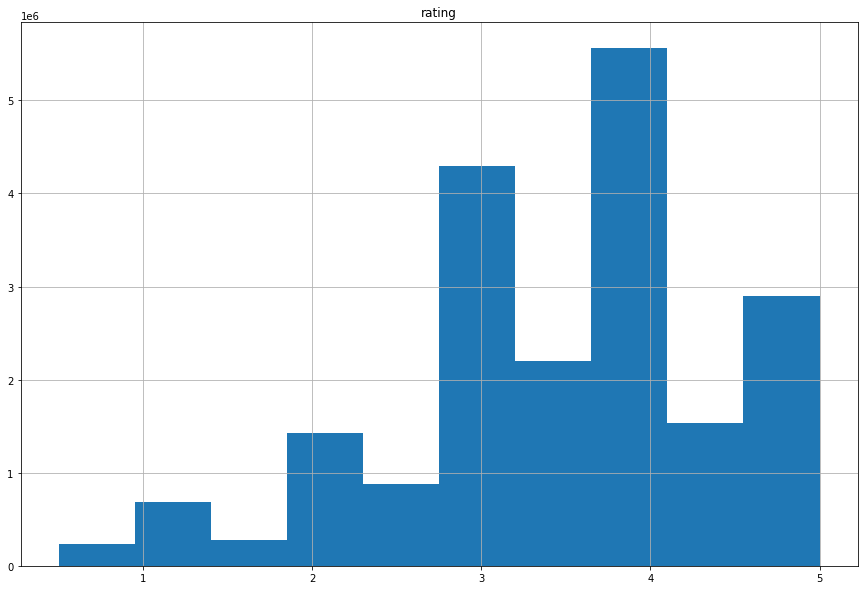

In [165]:
%matplotlib inline 
# this enables the plots to display in your Jupyter notebook

ratings.hist(column='rating', figsize=(15,10))

<i>source : https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review</i>

<AxesSubplot:>

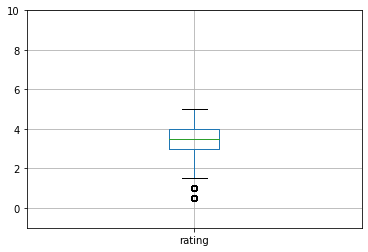

In [166]:
#Adjust y-axis label to go from -1 to 10
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_ylim((-1, 10))

#Plot using Pandas boxplot() function
ratings.boxplot(column='rating', figsize=(15,20))

## Slicing out columns
 

In [167]:
tags['tag'].head()

0      Mark Waters
1        dark hero
2        dark hero
3    noir thriller
4        dark hero
Name: tag, dtype: object

In [168]:
movies[['title','genres']].head() #recall that this is a way to select multiple columns from the dataframe

title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

### Slicing (contd.)

In [169]:
ratings[1000:1010] #this selects the rows 1000 through 1009 from the ratings dataframe

userId  movieId  rating
1000      11      527     4.5
1001      11      531     4.5
1002      11      541     4.5
1003      11      546     5.0
1004      11      551     5.0
1005      11      586     4.0
1006      11      587     4.5
1007      11      588     5.0
1008      11      589     4.5
1009      11      592     4.5

In [170]:
tag_counts = tags['tag'].value_counts()
tag_counts[:10]

sci-fi             3384
based on a book    3281
atmospheric        2917
comedy             2779
action             2657
surreal            2427
BD-R               2334
twist ending       2323
funny              2072
dystopia           1991
Name: tag, dtype: int64

### Slicing (contd.)

<AxesSubplot:>

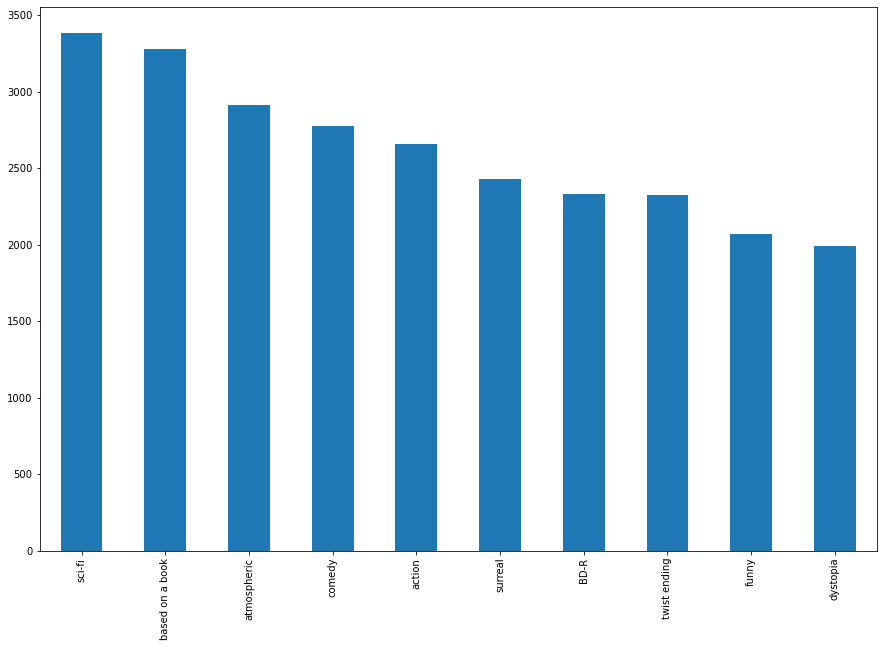

In [171]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

### Filters for selecting rows

In [172]:
is_highly_rated = ratings['rating'] >= 4.0 # selects rows with ratings of 4.0 and better

ratings[is_highly_rated][-5:] # retrieves the last 5 rows which satisfy the condition

userId  movieId  rating
20000256  138493    66762     4.5
20000257  138493    68319     4.5
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000261  138493    70286     5.0

In [173]:
is_animation = movies['genres'].str.contains('Animation') # we create a condition on each row that is true only if the movie has a 'Animation' genre

movies[is_animation][-5:]  # retrieves the last 5 rows which satisfy the condition

movieId                                title  \
27241   131132  Kleines Arschloch - Der Film (1997)   
27247   131144  Werner - Das muss kesseln!!! (1996)   
27248   131146        Werner - Volles Rooäää (1999)   
27269   131243  Werner - Gekotzt wird später (2003)   
27270   131248                Brother Bear 2 (2006)   

                                            genres  
27241                             Animation|Comedy  
27247                             Animation|Comedy  
27248                             Animation|Comedy  
27269                             Animation|Comedy  
27270  Adventure|Animation|Children|Comedy|Fantasy

### Groupby/Aggregate

In [174]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
# groupby : groups rows by thier rating values
# count : returns the number of elements in each group
# These are similar to the SQL functions presented earlier in this course
ratings_count

movieId
rating         
0.5      239125
1.0      680732
1.5      279252
2.0     1430997
2.5      883398
3.0     4291193
3.5     2200156
4.0     5561926
4.5     1534824
5.0     2898660

In [175]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
# this fetches the mean of the ratings for each movie
average_rating.tail()

rating
movieId        
131254      4.0
131256      4.0
131258      2.5
131260      3.0
131262      4.0

### Groupby/Aggregate

In [176]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
# this retrieves the number of ratings for each movie
movie_count.head()

rating
movieId        
1         49695
2         22243
3         12735
4          2756
5         12161

### Merging Dataframes

In [177]:
tags.head()

userId  movieId            tag
0      18     4141    Mark Waters
1      65      208      dark hero
2      65      353      dark hero
3      65      521  noir thriller
4      65      592      dark hero

In [178]:
movies.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

### Merging Dataframes (contd.)


We now merge the tags and movies dataframes into a dataframe 't'.<br>
This is similar to the SQL "JOIN".

In [179]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

movieId             title                                       genres  \
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
1        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
2        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
3        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   
4        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy   

   userId                                     tag  
0    1644                                 Watched  
1    1741                      computer animation  
2    1741                 Disney animated feature  
3    1741                         Pixar animation  
4    1741  TÃ©a Leoni does not star in this movie

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

## Exercise 4: Join Movies and Ratings

Let's create a single `DataFrame` that contains both titles and mean ratings of the popular fantasy movies.

Titles are only available in the `movies` `DataFrame`, while ratings in the `ratings` `DataFrame`, we would like to create a single DataFrame that includes Title.

In [200]:
mean_ratings = ratings.groupby('movieId').mean()
mean_ratings

userId    rating
movieId                         
1         69282.396821  3.921240
2         69169.928202  3.211977
3         69072.079388  3.151040
4         69652.913280  2.861393
5         69113.475454  3.064592
...                ...       ...
131254    79570.000000  4.000000
131256    79570.000000  4.000000
131258    28906.000000  2.500000
131260    65409.000000  3.000000
131262   133047.000000  4.000000

[26744 rows x 2 columns]

In [216]:
movie_titles = movies[['title', 'movieId']]
movie_titles

title  movieId
0                        Toy Story (1995)        1
1                          Jumanji (1995)        2
2                 Grumpier Old Men (1995)        3
3                Waiting to Exhale (1995)        4
4      Father of the Bride Part II (1995)        5
...                                   ...      ...
27273        Kein Bund für's Leben (2007)   131254
27274       Feuer, Eis & Dosenbier (2002)   131256
27275                  The Pirates (2014)   131258
27276                 Rentun Ruusu (2001)   131260
27277                    Innocence (2014)   131262

[27278 rows x 2 columns]

In [223]:
movie_df = pd.DataFrame(movie_titles)
movie_df

title  movieId
0                        Toy Story (1995)        1
1                          Jumanji (1995)        2
2                 Grumpier Old Men (1995)        3
3                Waiting to Exhale (1995)        4
4      Father of the Bride Part II (1995)        5
...                                   ...      ...
27273        Kein Bund für's Leben (2007)   131254
27274       Feuer, Eis & Dosenbier (2002)   131256
27275                  The Pirates (2014)   131258
27276                 Rentun Ruusu (2001)   131260
27277                    Innocence (2014)   131262

[27278 rows x 2 columns]

In [214]:
movie_titles.merge(movie_df, left_on='', right_on='')

SyntaxError: positional argument follows keyword argument (2493181390.py, line 1)

In [190]:
ratings

userId  movieId  rating
0              1        2     3.5
1              1       29     3.5
2              1       32     3.5
3              1       47     3.5
4              1       50     3.5
...          ...      ...     ...
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5

[20000263 rows x 3 columns]

In [196]:
ratings_mean = 
movie_titles = movies['title']


userId    rating
movieId                         
1         69282.396821  3.921240
2         69169.928202  3.211977
3         69072.079388  3.151040
4         69652.913280  2.861393
5         69113.475454  3.064592
...                ...       ...
131254    79570.000000  4.000000
131256    79570.000000  4.000000
131258    28906.000000  2.500000
131260    65409.000000  3.000000
131262   133047.000000  4.000000

[26744 rows x 2 columns]

In this case we don't even need to use a join operation, we can just create a new column in the `fantasy_movies` DataFrame. This will automatically match the index of `mean_ratings` with the index of `fantasy_movies` and attach to each movie its rating. Ratings for movies that are not in the `fantasy_movies` DataFrame are discarded.

The recommended way of creating columns in the recent versions of `pandas` is through the `assign` function, read its documentation!

In [ ]:
fantasy_movies.assign?

In [ ]:
fantasy_movies_with_ratings = fantasy_movies.assign(rating = mean_ratings)


In [ ]:
fantasy_movies_with_ratings.head()

In [ ]:
diff = fantasy_movies_with_ratings[fantasy_movies_with_ratings.movieId == 2].rating - 3.92
assert abs(diff.item()) < 0.01 , "Try again, missing or wrong rating"

### Other Analytics : Combine aggregation, merging, and filters to get useful analytics

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean() # this gives the avg rating for each movie from the ratings dataframe
del avg_ratings['userId'] # the avg is per movie, so we drop the 'userId' from the avg_ratings dataframe 
avg_ratings.head()

We now merge the movies and the avg_ratings dataframes on the "movieId" column. We call this new dataframe "box_office"

In [ ]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

### Other Analytics (contd.)

In [ ]:
is_highly_rated = box_office['rating'] >= 4.0 # this is similar to what we did a couple of code blocks ago
# but now we have the movie names as well, so we can make inferences

box_office[is_highly_rated][-5:]

In [ ]:
# Now lets try retreiving the Comedy movies 
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

### Other Analytics (contd.)

### Figuring out the Comedy Movies that were box office hits is now a one-liner

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

#### Working withh 'genre' :  we can split 'genres' into multiple columns

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
movie_genres[:10]

You can also add a new column to detect each genre: e.g. isComedy

This will be handy when creating features in your Machine Learning course

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

#### Extract year from title e.g. (1995)

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

### Parsing Timestamps

Timestamps are common in sensor data or other time series datasets

Let us revisit the tags.csv dataset and read the timestamps

In [ ]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')

In [ ]:
tags.dtypes

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [ ]:
tags.head(5)

Lets make those timestamps into something more readable

In [ ]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

In [ ]:
tags.head(2)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

## Average Movie Ratings over time

### Are Movie ratings related to the year of launch somehow?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
# we again find the average rating per movie
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
# we merge the movies and the average ratings into "joined"
joined.head()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
# this gives us the mean rating of all the movies in each year and save it into yearly_average dataframe
yearly_average[:10]

In [ ]:
#lets plot this yearly_avg
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>